In [ ]:
from IPython.display import Image

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 14549 (delta 8), reused 14 (delta 6), pack-reused 14522
Receiving objects: 100% (14549/14549), 13.23 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (9889/9889), done.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

In [ ]:
!pwd
%cd /content
!ls

/content/darknet
/content
darknet  gdrive  sample_data


In [ ]:
 # change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!cp /mydrive/yolov3/image.c src/
!mkdir result_img

cp: cannot stat '/mydrive/yolov3/image.c': No such file or directory
mkdir: cannot create directory ‘result_img’: File exists


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

In [ ]:
# verify CUDA
# !/usr/local/cuda/bin/nvcc --version

In [ ]:
!pwd

/content/darknet


In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
#%cd darknet
#! wget https://pjreddie.com/media/files/yolov3.weights
#!cp /mydrive/yolov3/yolov3.weights ../
#!./darknet detect cfg/yolov3.cfg yolov3.weights /images/plane.jpg
#Image('predictions.jpg')

# Step 2: Moving Your Custom Dataset Into Your Cloud VM
So now that you have your dataset properly formatted to be used for training we need to move it into this cloud VM so that when it comes the time we can actually use it for training.

I recommend renaming the folder with your images and text files on your local machine to be called '**obj**' and then creating a .zip folder of the 'obj' folder. Then I recommend uploading the zip to your Google Drive. So you should now have obj.zip someplace in your Google drive. 

This will **greatly reduce** the time it takes to transfer our dataset into our cloud VM.

Now we can copy in the zip and unzip it on your cloud VM.

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
#!ls /mydrive/yolov3

In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../


cp: cannot stat '/mydrive/yolov3/obj.zip': No such file or directory


In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

unzip:  cannot find or open ../obj.zip, ../obj.zip.zip or ../obj.zip.ZIP.


In [ ]:
!ls

3rdparty	darknet			json_mjpeg_streams.sh  results
backup		DarknetConfig.cmake.in	LICENSE		       scripts
build		darknet.py		Makefile	       src
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
build.sh	data			net_cam_v4.sh	       video_yolov4.sh
cfg		image_yolov3.sh		obj
cmake		image_yolov4.sh		README.md
CMakeLists.txt	include			result_img


# Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.

I have a detailed video on how to properly configure all four of these files to train a custom yolov3 detector. I will spare the time and ask you to watch the video in order to properly learn how to prepare the files.

You can access the video with this link! [Configuring YOLOv3 Files for Training](https://www.youtube.com/watch?v=zJDUhGL26iU&t=300s)

## i) Cfg File
Copy over the yolov3.cfg to edit by running the cell below.

In [ ]:
# download cfg to google drive and change its name
#!cp cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom.cfg

In [ ]:
## to download to local machine (change its name to yolov3_custom.cfg once you download)
#download('cfg/yolov3.cfg')

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov3_custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.
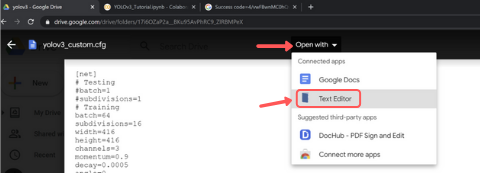

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** I set my **max_batches = 10000**, **steps = 8000, 9000**, I changed the **classes = 5** in the three YOLO layers and **filters = 30** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
#%cd cfg
#upload()
#%cd .. 

cp: cannot stat '/mydrive/yolov3/yolov3_custom.cfg': No such file or directory


## ii) obj.names and obj.data 
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

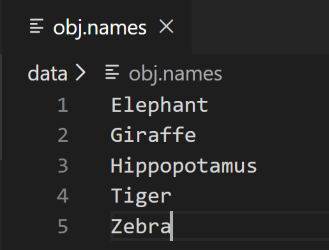

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

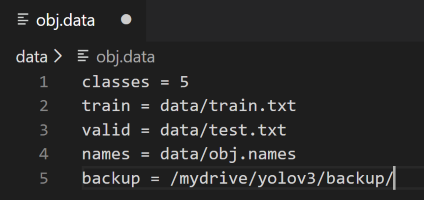



In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

cp: cannot stat '/mydrive/yolov3/obj.names': No such file or directory
cp: cannot stat '/mydrive/yolov3/obj.data': No such file or directory


## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

Luckily I have created a script that I showed in a past video that generates train.txt for us.

The script can be accessed from this [Github Repo](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

Just download the file to your local machine or Google drive so we can upload it to your cloud VM.

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolov3/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


cp: cannot stat '/mydrive/yolov3/generate_train.py': No such file or directory


Now we simply run the python script to do all the work for us.

In [ ]:
!python generate_train.py

python3: can't open file 'generate_train.py': [Errno 2] No such file or directory


In [ ]:
# verify train.txt can be seen in our darknet/data folder
# !ls data/

If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
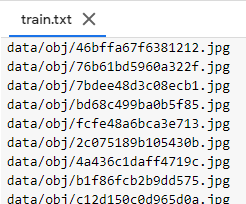

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
#!wget http://pjreddie.com/media/files/darknet53.conv.74

#!cp /mydrive/yolov3/darknet53.conv.74 ./

# Step 5: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv3 object detector on whatever crazy classes you have decided on. So run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

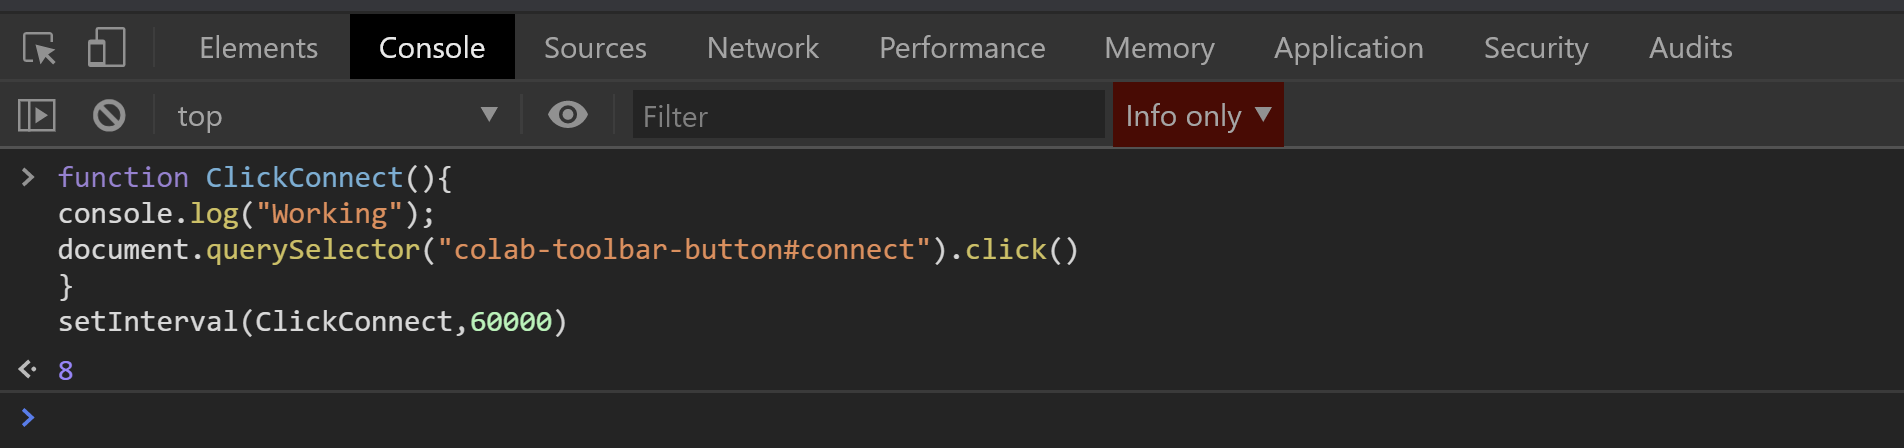

In [ ]:
# train your custom detector
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

In [ ]:
#from IPython.display import Image
#Image('chart.png')

In [ ]:
#!cp chart.png /mydrive/yolov3/chart.png
#!cp  /mydrive/yolov3/yolov3_custom.cfg
#download('chart.png')
#download('yolov3.weights')


**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
#from IPython.display import Image
#Image('chart.png')
#!cp chart.png /mydrive/yolov3/chart.png


# Step 6: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/check/17.png -dont_show -ext_output < data/train.txt > result.txt



/bin/bash: data/train.txt: No such file or directory


# OCR

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from PIL import Image 
import shutil
import os
import glob 
import re
import random
import matplotlib.pyplot as plt
try:
 from PIL import Image
except ImportError:
 import Image
from pytesseract import Output


cname=[]
coord=[]
thisdict = {}
#creating list with class_name left right top bottom
my_file = open("/content/darknet/result_img/coordinates.txt", "r")
content = my_file.read()
content_list = re.split('[^a-zA-Z0-9]',content)
my_file.close()

img = Image.open(r"/mydrive/yolov3/check/17.png")

print (content_list)
try:
    for i in range(0,len(content_list),5):
    
        left=int(content_list[i+1])
        right=int(content_list[i+2])
        top=int(content_list[i+3])
        bottom=int(content_list[i+4])

        IMG = img.crop((left,top,right,bottom))
        extractedInformation = pytesseract.image_to_string(IMG)
    
        if content_list[i]==content_list[i-5]:
             
             thisdict[content_list[i] + "_info"]=thisdict[content_list[i] + "_info"]+"\n"+extractedInformation
        else:
            thisdict[content_list[i] + "_info"]=extractedInformation


except IndexError:
    gotdata = 'null'
print(content_list[20])
print(thisdict["Skills_info"])

   




#image file 
path = "/content/darknet/result_img/*.jpg"   
files=glob.glob(path)





#trying to use the list to get text in respective class name variable for eg: Name containing akash srivastava
#for i in range 






['Contact', '103', '1105', '213', '287', 'Awards', '191', '800', '1517', '1696', 'Name', '182', '796', '83', '156', 'Experience', '147', '808', '462', '1369', 'Skills', '970', '1525', '1786', '2049', 'Skills', '163', '831', '1774', '1870', 'Ed', '151', '842', '1989', '2258', 'Interests', '979', '1465', '2100', '2280', 'Projects', '875', '1549', '310', '1731', '']
Skills
JavaScript, Go Lang :
. Operating System: Windows and Linux

- Development: Backend Development, Rest
API Development, DevOps Basics

. Industry Knowledge: System Design, Algo-
rithms Design and Data Structures, Linux Ad-
min, Restful API Design, Computer Vision
» Data Structures and Algorithms in C++: CODING BLOCKS.
» Data Science using R Workshop by NSIC New Delhi.
